In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

In [ ]:
image = np.load('/content/milky-way.npy')

In [ ]:
def create_mask(shape, x_pattern, y_pattern):
    mask = np.zeros(shape)
    mask[x_pattern, y_pattern] = 1
    return mask

image_shape = image[:, :, 0].shape

mask_R = create_mask(image_shape, slice(0, None, 2), slice(1, None, 2))
mask_G1 = create_mask(image_shape, slice(0, None, 2), slice(0, None, 2))
mask_G2 = create_mask(image_shape, slice(1, None, 2), slice(1, None, 2))
mask_B = create_mask(image_shape, slice(1, None, 2), slice(0, None, 2))

masked_image = np.zeros_like(image)
masked_image[:, :, 0] = image[:, :, 0] * mask_R
masked_image[:, :, 1] = image[:, :, 1] * (mask_G1 + mask_G2)
masked_image[:, :, 2] = image[:, :, 2] * mask_B

In [ ]:
kernel_R = np.array([[0, 0.5, 0], [0, 1, 0], [0, 0.5, 0]])
kernel_G = np.array([[0, 0.25, 0], [0.25, 1, 0.25], [0, 0.25, 0]])
kernel_B = np.array([[0, 0.5, 0], [0, 1, 0], [0, 0.5, 0]])

In [ ]:
def apply_convolution(channel, kernel):
    return convolve2d(channel, kernel, boundary='symm', mode='same')

R_interp = apply_convolution(masked_image[:, :, 0], kernel_R)
G_interp = apply_convolution(masked_image[:, :, 1], kernel_G)
B_interp = apply_convolution(masked_image[:, :, 2], kernel_B)

interpolated_image = np.clip(np.dstack((R_interp, G_interp, B_interp)), 0, 1)

In [ ]:
kernel = np.array([[0.25, 0.5, 0.25],
                   [0.5, 1.0, 0.5],
                   [0.25, 0.5, 0.25]])

def apply_convolution(channel, kernel, mask=None):
    if mask is not None:
        channel = channel * mask
    return convolve2d(channel, kernel, boundary='symm', mode='same')

R_conv = apply_convolution(masked_image[:, :, 0], kernel)
G1_conv = apply_convolution(masked_image[:, :, 1], kernel, mask_G1)
G2_conv = apply_convolution(masked_image[:, :, 1], kernel, mask_G2)
G_conv = (G1_conv + G2_conv) / 2
B_conv = apply_convolution(masked_image[:, :, 2], kernel)

convoluted_image = np.clip(np.dstack((R_conv, G_conv, B_conv)), 0, 1)

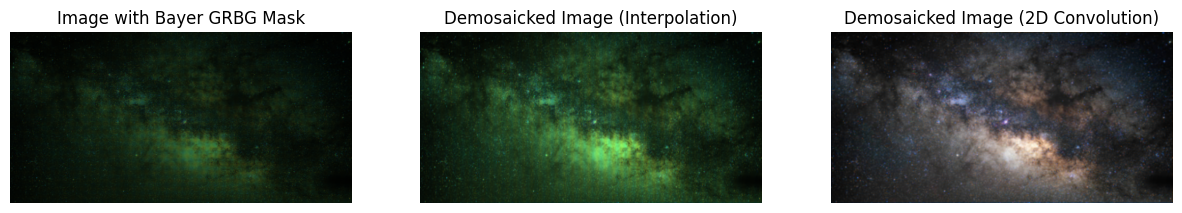

In [41]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(masked_image)
axs[0].set_title('Image with Bayer GRBG Mask')
axs[0].axis('off')

axs[1].imshow(interpolated_image)
axs[1].set_title('Demosaicked Image (Interpolation)')
axs[1].axis('off')

axs[2].imshow(convoluted_image)
axs[2].set_title('Demosaicked Image (2D Convolution)')
axs[2].axis('off')

plt.show()